<a href="https://colab.research.google.com/github/ainunsyafna/Project-Market-Basket-Analysis/blob/main/Market_Basket_Analysis_Ainun_Syafna_Maharani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module

In [ ]:
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
    !pip install pycaret
except:
    !pip install mlxtend 
    !pip install pycaret
    print("Running the code locally, make sure to install required modules.") #IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.8/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#import module yang dibutuhkan
import warnings; warnings.simplefilter('ignore')
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *
import time

%matplotlib inline
plt.style.use('bmh'); sns.set()

#Data

In [ ]:
df = pd.read_csv('https://github.com/ainunsyafna/Project-Market-Basket-Analysis/blob/main/Groceries-data.csv?raw=true')
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


#Pre-Processing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [ ]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [ ]:
df.duplicated().sum()

759

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['month'] = df['month'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['Date'] = df['Date'].astype('datetime64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
 3   year             38006 non-null  int64         
 4   month            38006 non-null  category      
 5   day              38006 non-null  int64         
 6   day_of_week      38006 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(3), object(1)
memory usage: 1.8+ MB


In [ ]:
df['month'].unique()

[7, 5, 9, 12, 1, ..., 3, 4, 11, 10, 6]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [ ]:
df['month'] = df['month'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [ ]:
df['month'].value_counts()

August       3435
May          3276
January      3273
June         3246
July         3212
November     3208
March        3201
October      3155
April        3108
December     3012
February     2962
September    2918
Name: month, dtype: int64

In [ ]:
df['day_of_week'].unique()

[1, 4, 5, 2, 0, 3, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [ ]:
df['day_of_week'] = df['day_of_week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [ ]:
df['day_of_week'].value_counts()

Thursday     5630
Wednesday    5561
Sunday       5521
Friday       5399
Tuesday      5396
Saturday     5296
Monday       5203
Name: day_of_week, dtype: int64

In [ ]:
def group_week(week):
    if week < 9:
        return "Week 1"
    elif week > 8 and week < 16:
        return "Week 2"
    elif week > 15 and week < 23:
        return "Week 3"
    elif week > 22 and week < 31:
        return "Week 4"

In [ ]:
df['day'] = df['day'].apply(group_week)
order = ['Week 1','Week 2','Week 3','Week 4']

In [ ]:
df['day'].value_counts()

Week 1    10005
Week 4     9961
Week 2     8813
Week 3     8572
Name: day, dtype: int64

In [ ]:
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [ ]:
df['itemcategory'] = df['itemDescription'].replace({'tropical fruit':'fruit','whole milk':'dairy product','pip fruit':'fruit','other vegetables':'vegetables',
                                                'rolls/buns':'grain product','pot plants':'household product','citrus fruit':'fruit','frankfurter':'meat','beef':'meat',
                                                'chicken':'meat','butter':'dairy product','fruit/vegetable juice':'beverage','packaged fruit/vegetables':'fruit',
                                                'chocolate':'dessert','specialty bar':'dessert','butter milk':'dairy product','bottled water':'beverage',
                                                'yogurt':'dairy product','sausage':'meat','brown bread':'grain product','hamburger meat':'meat',
                                                'root vegetables':'vegetables','pork':'meat','pastry':'grain product','canned beer':'alcoholic beverage',
                                                'berries':'fruit','coffee':'beverage','misc. beverages':'beverage','ham':'meat','turkey':'meat',
                                                'curd cheese':'dairy product','red/blush wine':'alcoholic beverage','frozen potato products':'vegetables',
                                                'flour':'grain product','frozen meals':'food','herbs':'vegetables','soda':'beverage','detergent':'cleansing product',
                                                'grapes':'fruit','processed cheese':'dairy product','fish':'meat','sparkling wine':'alcoholic beverage',
                                                'newspapers':'paper','curd':'dairy product','pasta':'food','popcorn':'food','finished products':'food',
                                                'beverages':'beverage','bottled beer':'alcoholic beverage','dog food':'pet needs','specialty chocolate':'dessert',
                                                'condensed milk':'dairy product','cleaner':'cleansing product','white wine':'alcoholic beverage','ice cream':'dessert',
                                                'hard cheese':'dairy product','cream cheese ':'dairy product','liquor':'alcoholic beverage','pickled vegetables':'vegetables',
                                                'liquor (appetizer)':'alcoholic beverage','UHT-milk':'dairy product','candy':'sweets','sugar':'sweets','onions':'vegetables',
                                                'hair spray':'cosmetics','photo/film':'household product','domestic eggs':'dairy product','margarine':'dairy product',
                                                'shopping bags':'plastic','salt':'condiment','oil':'condiment','whipped/sour cream':'dairy product',
                                                'frozen vegetables':'vegetables','sliced cheese':'dairy product','dish cleaner':'cleansing product',
                                                'baking powder':'condiment','specialty cheese':'dairy product','salty snack':'food','Instant food products':'food',
                                                'pet care':'pet needs','white bread':'grain product','female sanitary products':'cleansing product',
                                                'cling film/bags':'plastic','soap':'cleansing product','frozen chicken':'meat','house keeping products':'cleansing product',
                                                'spread cheese':'dairy product','decalcifier':'cleansing product','frozen dessert':'dessert','vinegar':'condiment',
                                                'nuts/prunes':'fruit','potato products':'vegetables','frozen fish':'meat','hygiene articles':'paper',
                                                'artif. sweetener':'sweets','light bulbs':'household product','canned vegetables':'vegetables',
                                                'chewing gum':'sweets','canned fish':'meat','cookware':'household product','semi-finished bread':'dairy product',
                                                'cat food':'pet needs','bathroom cleaner':'cleansing product','prosecco':'alcoholic beverage','liver loaf':'meat',
                                                'zwieback':'grain product','canned fruit':'fruit','frozen fruits':'fruit','brandy':'alcoholic beverage',
                                                'baby cosmetics':'cosmetics','spices':'condiment','napkins':'household product','waffles':'dessert',
                                                'sauces':'condiment','rum':'alcoholic beverage','chocolate marshmallow':'dessert','long life bakery product':'grain product',
                                                'bags':'plastic','sweet spreads':'sweets','soups':'food','mustard':'condiment','specialty fat':'dessert',
                                                'instant coffee':'beverage','snack products':'food','organic sausage':'food','soft cheese':'dairy product',
                                                'mayonnaise':'condiment','dental care':'cosmetics','roll products ':'household product','kitchen towels':'household product',
                                                'flower soil/fertilizer':'household product','cereals':'grain product','meat spreads':'meat','dishes':'food',
                                                'male cosmetics':'cosmetics','candles':'household product','whisky':'alcoholic beverage','tidbits':'dessert',
                                                'cooking chocolate':'dessert','seasonal products':'condiment','liqueur':'alcoholic beverage',
                                                'abrasive cleaner':'cleansing product','syrup':'beverage','ketchup':'condiment','cream':'dairy product',
                                                'skin care':'cosmetics','rubbing alcohol':'cleansing product','nut snack':'food','cocoa drinks':'beverage',
                                                'softener':'cleansing product','organic products':'vegetables','cake bar':'dessert','honey':'sweets',
                                                'jam':'sweets','kitchen utensil':'household product','flower (seeds)':'household product','rice':'grain product',
                                                'tea':'beverage','salad dressing':'condiment','specialty vegetables':'vegetables','pudding powder':'dessert',
                                                'ready soups':'food','make up remover':'cosmetics','toilet cleaner':'cleansing product',
                                                'preservation products':'cleansing product'})

In [ ]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week,itemcategory
0,1808,2015-07-21,tropical fruit,2015,July,Week 3,Tuesday,fruit
1,2552,2015-05-01,whole milk,2015,May,Week 1,Friday,dairy product
2,2300,2015-09-19,pip fruit,2015,September,Week 3,Saturday,fruit
3,1187,2015-12-12,other vegetables,2015,December,Week 2,Saturday,vegetables
4,3037,2015-01-02,whole milk,2015,January,Week 1,Friday,dairy product
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,August,Week 2,Sunday,dairy product
38761,2022,2014-02-23,candy,2014,February,Week 4,Sunday,sweets
38762,1097,2014-04-16,cake bar,2014,April,Week 3,Wednesday,dessert
38763,1510,2014-03-12,fruit/vegetable juice,2014,March,Week 2,Wednesday,beverage


In [ ]:
df['itemcategory'].unique()

array(['fruit', 'dairy product', 'vegetables', 'grain product',
       'household product', 'meat', 'beverage', 'dessert',
       'alcoholic beverage', 'sweets', 'food', 'cleansing product',
       'paper', 'pet needs', 'cosmetics', 'plastic', 'condiment'],
      dtype=object)

In [ ]:
df['itemcategory'].value_counts()

dairy product         8509
meat                  4199
vegetables            4080
beverage              3950
grain product         3907
fruit                 3277
alcoholic beverage    2034
dessert               1985
food                  1094
condiment              879
household product      837
sweets                 804
plastic                790
paper                  787
cleansing product      438
pet needs              329
cosmetics              107
Name: itemcategory, dtype: int64

#Exploratory Data Analysis

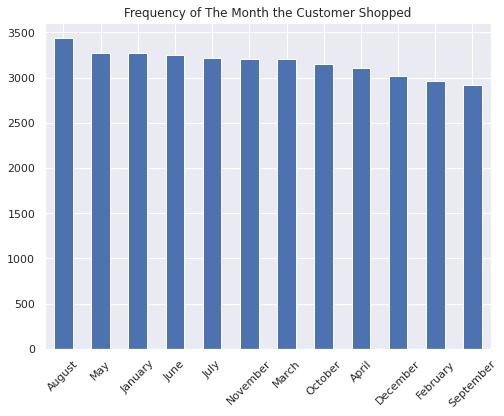

In [ ]:
df['month'].value_counts().plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title('Frequency of The Month the Customer Shopped');

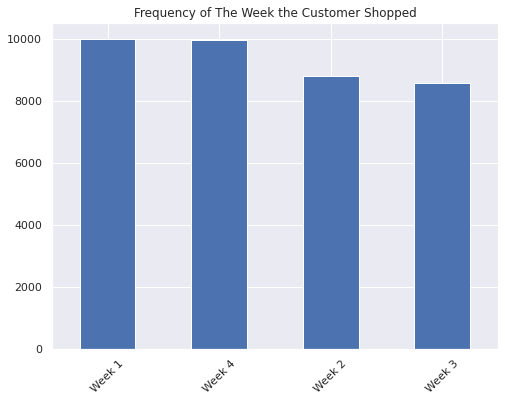

In [ ]:
df['day'].value_counts().plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title('Frequency of The Week the Customer Shopped');

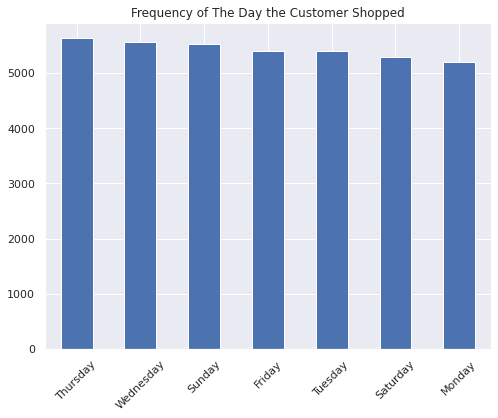

In [ ]:
df['day_of_week'].value_counts().plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title('Frequency of The Day the Customer Shopped');

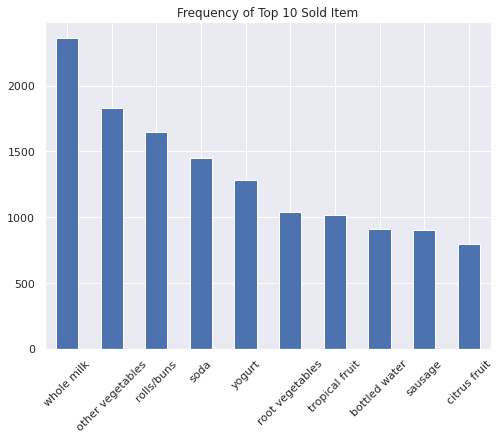

In [ ]:
df['itemDescription'].value_counts()[:10].plot.bar(figsize=(8,6))
plt.xticks(rotation=45)
plt.title('Frequency of Top 10 Sold Item');

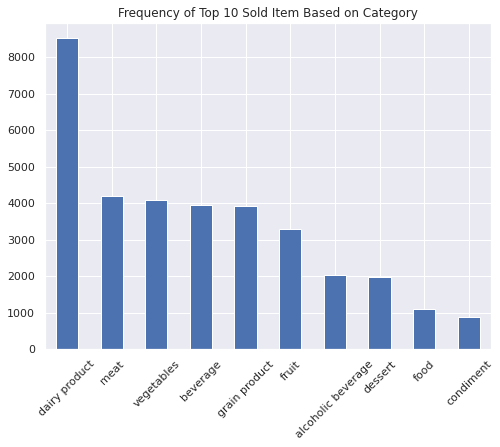

In [ ]:
df['itemcategory'].value_counts()[:10].plot.bar(figsize=(8,6))
plt.xticks(rotation=45)
plt.title('Frequency of Top 10 Sold Item Based on Category');

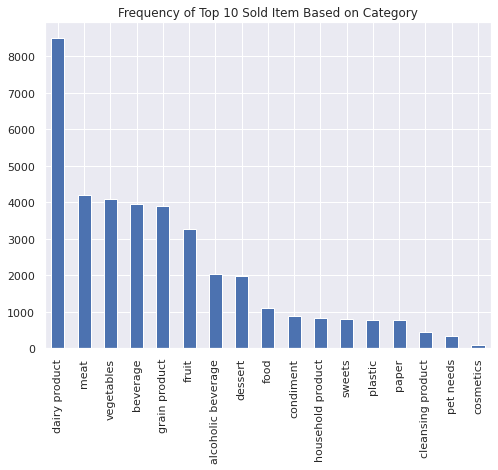

In [ ]:
df['itemcategory'].value_counts().plot.bar(figsize=(8,6))
plt.xticks(rotation=90)
plt.title('Frequency of Sold Item Based on Category');

#Market Basket Analysis

In [ ]:
df2 = (df.groupby(['Member_number', 'itemcategory'])['itemcategory'].count().unstack().reset_index().fillna(0).set_index('Member_number'))
df2

itemcategory,alcoholic beverage,beverage,cleansing product,condiment,cosmetics,dairy product,dessert,food,fruit,grain product,household product,meat,paper,pet needs,plastic,sweets,vegetables
Member_number,,,,,,,,,,,,,,,,,
1000,1.0,2.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
1001,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1003,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1004,2.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,3.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,1.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def convertToZeroOne(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df3 = df2.applymap(convertToZeroOne)
df3

itemcategory,alcoholic beverage,beverage,cleansing product,condiment,cosmetics,dairy product,dessert,food,fruit,grain product,household product,meat,paper,pet needs,plastic,sweets,vegetables
Member_number,,,,,,,,,,,,,,,,,
1000,1,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
1001,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1002,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1
1003,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
1004,1,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0
4997,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


Here, created a function called `onvertToZeroOne` which encodes the units. If the unit is equal to or less than 0, the unit will change to 0 (Not purchased). If units are greater than or equal to 1, then units will be 1 (purchased). In this way, we generate a dataframe indicating whether a particular item was purchased or not.

In [ ]:
start_time = time.time()
frequent_itemsets = apriori(df3, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
end_time = time.time()
frequent_itemsets

,support,itemsets
4,0.843253,(dairy product)
10,0.633915,(meat)
14,0.626219,(vegetables)
1,0.621088,(beverage)
8,0.609800,(grain product)
...,...,...
205,0.102617,"(dairy product, food, beverage, vegetables)"
88,0.102104,"(dairy product, food, alcoholic beverage)"
142,0.101847,"(fruit, plastic, dairy product)"
228,0.100564,"(dairy product, meat, food, grain product)"


In [ ]:
frequent_itemsets[:10]

,support,itemsets
4,0.843253,(dairy product)
10,0.633915,(meat)
14,0.626219,(vegetables)
1,0.621088,(beverage)
8,0.609800,(grain product)
7,0.555670,(fruit)
45,0.550282,"(dairy product, meat)"
49,0.548743,"(dairy product, vegetables)"
24,0.537968,"(dairy product, beverage)"
43,0.530272,"(dairy product, grain product)"


Apriori algorithm is used to find the most frequently purchased products (best selling products) using the support value. In this case we define best-selling products as products that have been sold at 10% of the total transactions, meaning we will provide a support value of 0.1.

Based on this output, there are 268 transactions that are considered as best-selling products. It can be seen in the dataframe that dairy product is the best-selling product with a support value of 0.843253, followed by meat and vegetables with respective support values ​​of 0.633915 and 0.626219. In terms of bundling, dairy product and meat are the most frequently purchased bundle transactions with a support value of 0.550282. This means that these items are most often purchased together of the whole.

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2369,"(meat, alcoholic beverage)","(grain product, beverage, vegetables)",0.276296,0.269112,0.105695,0.382544,1.421503,0.031341,1.183708
2368,"(grain product, beverage, vegetables)","(meat, alcoholic beverage)",0.269112,0.276296,0.105695,0.392755,1.421503,0.031341,1.191783
2364,"(meat, grain product, vegetables)","(alcoholic beverage, beverage)",0.285018,0.261929,0.105695,0.370837,1.415791,0.031041,1.173100
2373,"(alcoholic beverage, beverage)","(meat, grain product, vegetables)",0.261929,0.285018,0.105695,0.403526,1.415791,0.031041,1.198681
1314,"(fruit, meat, dairy product)","(grain product, beverage, vegetables)",0.338122,0.269112,0.127501,0.377086,1.401223,0.036508,1.173337
...,...,...,...,...,...,...,...,...,...
677,(condiment),(dairy product),0.197794,0.843253,0.171883,0.869001,1.030535,0.005093,1.196554
1,(meat),(dairy product),0.633915,0.843253,0.550282,0.868070,1.029430,0.015732,1.188104
0,(dairy product),(meat),0.843253,0.633915,0.550282,0.652571,1.029430,0.015732,1.053697
4,(dairy product),(beverage),0.843253,0.621088,0.537968,0.637968,1.027178,0.014234,1.046626


From the results of the `association_rule` we can see that grain product, beverage, and vegetables are most often purchased with meat and alcoholic beverage with a lift of 1.421503, these items have the highest association because they have a high lift value.

In [ ]:
rules[(rules['lift'] >= 1.3) & (rules['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1306,"(fruit, grain product, beverage, vegetables)","(dairy product, meat)",0.174962,0.550282,0.127501,0.728739,1.324301,0.031223,1.657879
1494,"(fruit, alcoholic beverage, vegetables)","(dairy product, meat)",0.170087,0.550282,0.123653,0.726998,1.321138,0.030057,1.647309
1920,"(fruit, beverage, dessert)","(dairy product, meat)",0.160852,0.550282,0.116727,0.725678,1.318738,0.028213,1.639378


After filtering the `rules` by looking for a lift value that is greater than or equal to 1.3 and confidence value that is greater than or equal to 0.7, it can be seen that there are only 3 categories that have associations according to the criteria that we define, that is 
* Purchased dairy product and meat also purchased fruit, grain product, beverage, and vegetables. 
* Purchased dairy product and meat also purchased fruit, alcoholic beverage, and vegetables.
* Purchased dairy product and meat also purchased fruit, beverage, and dessert. 

#Conclusion

Based on exploratory data analysis, there are several conclusions 
- Most customers shop in August on Thursday. 
- Most customers shop in the fourth week and the first week. This may be influenced by the average worker in Indonesia getting his monthly salary in the range of 25 - 1 of each month (based on the CNBC website).
- There are 3 best-selling item categories, that is dairy products, meat, and vegetables with 3 best-selling item descriptions that is whole milk, other vegetables, and rolls/buns.


Based on apriori algorithm obtained 3 rule associations,
* Purchased dairy product and meat also purchased fruit, grain product, beverage, and vegetables. 
* Purchased dairy product and meat also purchased fruit, alcoholic beverage, and vegetables.
* Purchased dairy product and meat also purchased fruit, beverage, and dessert. 

#Recommendation

* The marketing strategy that can be carried out is to offer member loyalty to customers, that is, every customer who purchases will get points. The more products a customer buys, the more points they will get. Points earned by customers can then be used for discounts on subsequent purchases.
* Based on the results of the EDA, it is known that the day with the fewest customers to shop is Monday. Therefore, marketing strategies can be implemented such as special discounts every Monday for certain products. Products that are given a discount can be products that are purchased a little by customers. With the application of discounts on products, it is hoped that customers will be interested in shopping on Monday and at the same time buy products that are given a discount.
* The confidence value of the first rule is 0.728739 (it can be said to be large), that is, every purchase of dairy product and meat also purchased fruit, grain product, beverage, and vegetables can be applied to the distance positioning marketing strategy, which is keeping dairy products and meat away from fruit, grain product, beverage, and vegetables which aims to allow customers to browse other products. By implementing this strategy, it is expected that sales of other products can increase.
* Create bundling packages between products that are purchased a lot with products that are purchased a little. Some bundling package recommendations are
  1. Dairy product with sweets
  2. Vegetables or fruits with cleansing product such as fruit and vegetable cleaner

